In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Load the CSV files
train_data = pd.read_csv(r"C:\Users\SAI KEERTHAN\Downloads\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\SAI KEERTHAN\Downloads\mnist_test.csv")

In [3]:
# Separate features and labels
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


In [8]:
# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # 28*28 = 784
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\SAI KEERTHAN\infosys springboard intership project\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8549 - loss: 0.5041 - val_accuracy: 0.9519 - val_loss: 0.1551
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9645 - loss: 0.1165 - val_accuracy: 0.9587 - val_loss: 0.1359
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9766 - loss: 0.0751 - val_accuracy: 0.9730 - val_loss: 0.0897
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9742 - val_loss: 0.0881
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9703 - val_loss: 0.1073


In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9709 - loss: 0.1026
Test accuracy: 97.48%


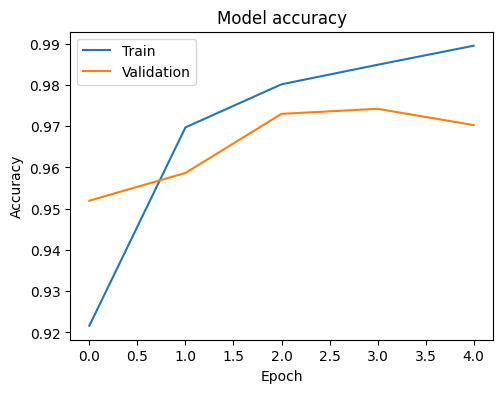

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

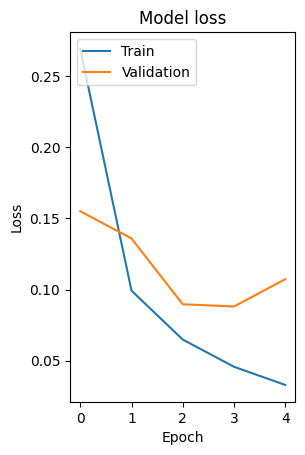

In [13]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
# Save the trained model
model.save('mlp_baseline_model.h5')